### Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 

### reading the dataset

###### Bank Marketing Dataset
The data is related with direct marketing campaigns of a Portuguese banking institution.

The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 

In order to access if the product (bank term deposit) would be (or not) subscribed. 


In [2]:
data = pd.read_csv("data/bank-full.csv",sep=";")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Analysing the dataset

In [3]:
## To get the DataType of each columns and go through the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
## To go through the count mean percentile standard dev etc of each column in dataframe
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
## Findout the Null values in DataFrame
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Plotting the features of the dataset

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64


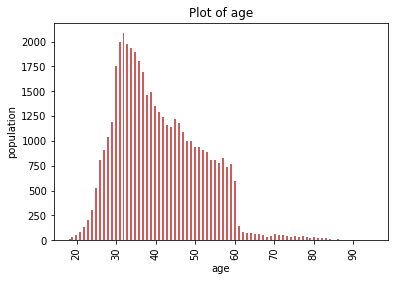

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


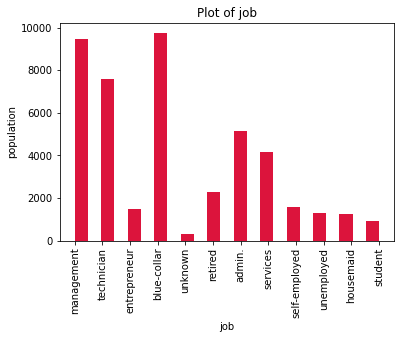

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


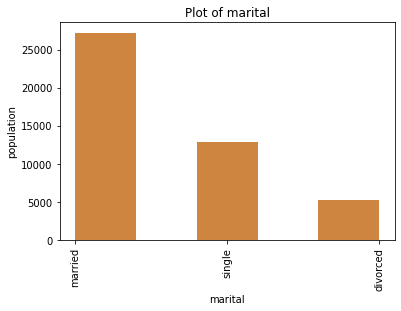

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


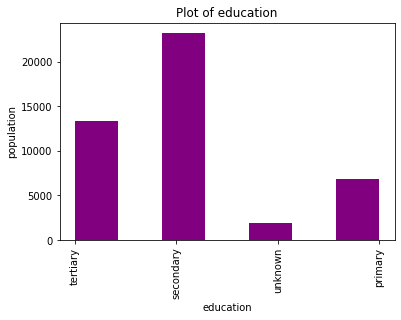

no     44396
yes      815
Name: default, dtype: int64


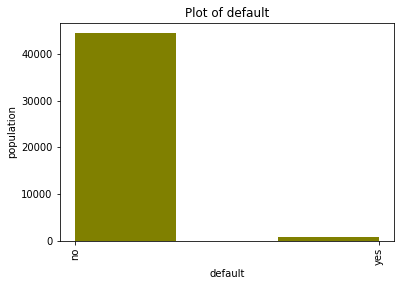

no     39922
yes     5289
Name: y, dtype: int64


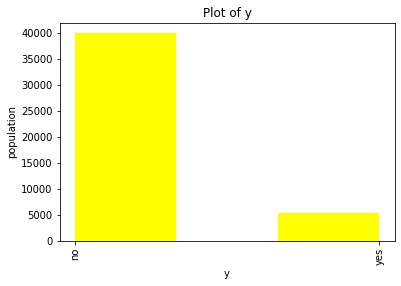

In [6]:
color_col = ["indianred","crimson","peru","purple","olive","yellow"]
data_col = ["age",'job','marital', 'education','default','y']
for col,clr in zip(data_col,color_col):
    x = data[col]
    print(x.value_counts())
    plt.hist(x = x, bins = 2*len(x.unique())-1, color = clr)
    plt.title(f'Plot of {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('population')
    plt.xticks(rotation = 90)
    plt.show()

### Removing the unnecassary features from the dataset

In [7]:
data = data.drop(['contact', 'day'], axis = 1)
print(data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'],
      dtype='object')


### splitting the dataset into x(independent variables) and y(dependent variables)

In [8]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
print(x.shape)
print(y.shape)
print(x.columns)

(45211, 14)
(45211,)
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome'],
      dtype='object')


### Convert column y into Numerical

In [9]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([0, 0, 0, ..., 1, 0, 0])

### Implementing one hot encoding


In [10]:
from sklearn.preprocessing import OneHotEncoder
def get_all_col(enc): ## This is function to get the list of all the encoded columns
    all_cat_col = []
    for cat in enc.categories_:
        for val in cat:
            all_cat_col.append(val)
    return all_cat_col

cat_col = x.select_dtypes(include=['object']).columns.copy() ## Select only categorical columns
enc = OneHotEncoder(sparse=False) ## Defining one hot encoder
ohec = enc.fit_transform(x[cat_col])
encoded_df = pd.DataFrame(ohec,columns=get_all_col(enc)) ## Creating DataFrame from ndarray

x = x.join(encoded_df).drop(cat_col,axis=1)

x.head()

,age,balance,duration,campaign,pdays,previous,admin.,blue-collar,entrepreneur,housemaid,...,jun,mar,may,nov,oct,sep,failure,other,success,unknown
0,58,2143,261,1,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,44,29,151,1,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33,2,76,1,-1,0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,47,1506,92,1,-1,0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33,1,198,1,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
# # Encoding Categorical variables into numerical variables
# # One Hot Encoding
# x = pd.get_dummies(x)
# x

In [12]:
# splitting the data into training and testing set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(33908, 47)
(33908,)
(11303, 47)
(11303,)


In [13]:
# Feature Scaling 
# Only on Independent Variable to convert them into values ranging from -1 to +1

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

x_train = pd.DataFrame(x_train)
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,-0.182764,0.804030,-0.718420,-0.568359,-0.411313,-0.239065,-0.356684,-0.523651,-0.184906,-0.165595,...,-0.363373,-0.105892,-0.661400,-0.312913,-0.12781,-0.11226,-0.35072,-0.204491,-0.184309,0.472521
1,-0.937547,-0.097112,-0.679683,-0.568359,-0.411313,-0.239065,-0.356684,-0.523651,-0.184906,-0.165595,...,-0.363373,-0.105892,-0.661400,-0.312913,-0.12781,-0.11226,-0.35072,-0.204491,-0.184309,0.472521
2,-0.465807,-0.157360,0.404962,1.050204,-0.411313,-0.239065,2.803606,-0.523651,-0.184906,-0.165595,...,-0.363373,-0.105892,1.511945,-0.312913,-0.12781,-0.11226,-0.35072,-0.204491,-0.184309,0.472521
3,-2.069721,-0.315873,0.269381,0.079067,-0.411313,-0.239065,-0.356684,-0.523651,-0.184906,-0.165595,...,-0.363373,-0.105892,-0.661400,-0.312913,-0.12781,-0.11226,-0.35072,-0.204491,-0.184309,0.472521
4,0.383324,-0.442812,-0.609956,-0.568359,-0.411313,-0.239065,-0.356684,-0.523651,-0.184906,6.038825,...,2.751990,-0.105892,-0.661400,-0.312913,-0.12781,-0.11226,-0.35072,-0.204491,-0.184309,0.472521


### Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

dt_model = DecisionTreeClassifier() 
dt_model.fit(x_train, y_train)

y_pred = dt_model.predict(x_test)

print("Training Accuracy :", dt_model.score(x_train, y_train))
print("Testing Accuaracy :", dt_model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Testing Accuaracy : 0.8640184021941077
[[9159  819]
 [ 718  607]]


### Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)

print("Training Accuracy :", rf_model.score(x_train, y_train))
print("Testing Accuracy :", rf_model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9999410168691755
Testing Accuracy : 0.9002919578872866
[[9677  301]
 [ 826  499]]


In [16]:
# k fold cross validation

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = rf_model, X = x_train, y = y_train, cv = 10)
print(cvs)

[0.90061929 0.89501622 0.89943969 0.89973459 0.90209378 0.90238868
 0.90504276 0.90917134 0.90943953 0.90530973]


In [17]:
print("Mean Accuracy :", cvs.mean())
print("Variance :", cvs.std())

Mean Accuracy : 0.9028255602849466
Variance : 0.004274324985688046


### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

y_pred = lr_model.predict(x_test)

print("Training Accuracy :", lr_model.score(x_train, y_train))
print("Testing Accuracy :", lr_model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9019700365695411
Testing Accuracy : 0.9005573741484562
[[9707  271]
 [ 853  472]]


### Support Vector Machine

In [19]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(x_train, y_train)

y_pred = svc_model.predict(x_test)

print("Training Accuracy :", svc_model.score(x_train, y_train))
print("Testing Accuracy :", svc_model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9143564940427038
Testing Accuracy : 0.8979916836238166
[[9757  221]
 [ 932  393]]


In [20]:
# k fold cross validatio
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = svc_model, X = x_train, y = y_train, cv = 10)
print(cvs)

[0.89442642 0.90150398 0.90032439 0.89619581 0.8979652  0.90238868
 0.90327337 0.91005603 0.90235988 0.89941003]


In [21]:
all_models = {
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'Logistic Regression': lr_model,
    'Support Vector Machine': svc_model
}

### Let us predict the output with one example 
#### We are wroking with two dataset

In [33]:
search_query = data.iloc[25,:]
search_query

age                 44
job             admin.
marital        married
education    secondary
default             no
balance           -372
housing            yes
loan                no
month              may
duration           172
campaign             1
pdays               -1
previous             0
poutcome       unknown
y                   no
Name: 25, dtype: object

In [34]:
def get_accuracy(search_query):
    def get_all_col(enc): ## This is function to get the list of all the encoded columns
        all_cat_col = []
        for cat in enc.categories_:
            for val in cat:
                all_cat_col.append(val)
        return all_cat_col

    query_dataframe = pd.DataFrame(search_query).T
    query_output = query_dataframe['y']
    query_data = query_dataframe.drop(['y'],axis=1)
    q_ohec = enc.transform(query_data[cat_col])
    q_encoded_df = pd.DataFrame(q_ohec,columns=get_all_col(enc)) ## Creating DataFrame from ndarray
    query_data = query_data.join(q_encoded_df).drop(cat_col,axis=1)
    query_data = query_data.replace(np.nan,0)
    query_data = sc.transform(query_data)

    ## Iterating through all the models
    for model_name,model in all_models.items():
        print(f"\n Predicting with {model_name} Model with accuracy -", model.score(x_test, y_test)*100,"%")
        print(f" What our model predicts => ",model.predict(query_data))
        print(f" What actual value is  => ",query_output.values[0])
get_accuracy(search_query)


 Predicting with Decision Tree Model with accuracy - 86.40184021941077 %
 What our model predicts =>  [0]
 What actual value is  =>  no

 Predicting with Random Forest Model with accuracy - 90.02919578872866 %
 What our model predicts =>  [0]
 What actual value is  =>  no

 Predicting with Logistic Regression Model with accuracy - 90.05573741484561 %
 What our model predicts =>  [0]
 What actual value is  =>  no

 Predicting with Support Vector Machine Model with accuracy - 89.79916836238166 %
 What our model predicts =>  [0]
 What actual value is  =>  no


In [31]:
search_query = data.iloc[45208,:]
search_query

age                 72
job            retired
marital        married
education    secondary
default             no
balance           5715
housing             no
loan                no
month              nov
duration          1127
campaign             5
pdays              184
previous             3
poutcome       success
y                  yes
Name: 45208, dtype: object

In [32]:
def get_accuracy(search_query):
    def get_all_col(enc): ## This is function to get the list of all the encoded columns
        all_cat_col = []
        for cat in enc.categories_:
            for val in cat:
                all_cat_col.append(val)
        return all_cat_col

    query_dataframe = pd.DataFrame(search_query).T
    query_output = query_dataframe['y']
    query_data = query_dataframe.drop(['y'],axis=1)
    q_ohec = enc.transform(query_data[cat_col])
    q_encoded_df = pd.DataFrame(q_ohec,columns=get_all_col(enc)) ## Creating DataFrame from ndarray
    query_data = query_data.join(q_encoded_df).drop(cat_col,axis=1)
    query_data = query_data.replace(np.nan,0)
    query_data = sc.transform(query_data)

    ## Iterating through all the models
    for model_name,model in all_models.items():
        print(f"\n Predicting with {model_name} Model with accuracy -", model.score(x_test, y_test)*100,"%")
        print(f" What our model predicts => ",model.predict(query_data))
        print(f" What actual value is  => ",query_output.values[0])
get_accuracy(search_query)


 Predicting with Decision Tree Model with accuracy - 86.40184021941077 %
 What our model predicts =>  [0]
 What actual value is  =>  yes

 Predicting with Random Forest Model with accuracy - 90.02919578872866 %
 What our model predicts =>  [0]
 What actual value is  =>  yes

 Predicting with Logistic Regression Model with accuracy - 90.05573741484561 %
 What our model predicts =>  [1]
 What actual value is  =>  yes

 Predicting with Support Vector Machine Model with accuracy - 89.79916836238166 %
 What our model predicts =>  [0]
 What actual value is  =>  yes


### Conclusion

As we can conclude from our analysis that regression model works out to be the best model with accuracy of 90.055% 

